## Transfer Learning
Adapted from https://www.mlq.ai/transfer-learning-tensorflow-2-0/
and https://www.tensorflow.org/tutorials/images/transfer_learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random

import tensorflow as tf

In [2]:
## Import model
model = tf.keras.applications.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 81s 1us/step


In [3]:
## include_top = False : exclude the end of the network 
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top = False) 

print(base_model.summary())

94773248/94765736 [==============================] - 124s 1us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
________________________

In [4]:
## visualize the various layers
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [5]:
## take output from base model and perform GlobalAveragePooling2D
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [6]:
## add a dense network at the end
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation ='softmax')(x)

In [7]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)

In [8]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [10]:
## freeze the layers that have already been trained
for layer in model.layers[:175]:
    layer.trainable = False
    
for layer in model.layers[175:]:
    layer.trainable = True

In [11]:
## apply to new data: preprocess the new data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [ ]:
# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/My Drive/Colab Notebooks/TF 2.0 Advanced/Transfer Learning Data/train/', 
#     target_size = (224, 224),
#     color_mode = 'rgb',
#     batch_size = 32,
#     class_mode = 'categorical',
#     shuffle = True)

In [12]:
# compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit_generator(generator = train_generator, 
                              steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 5)

NameError: name 'train_generator' is not defined

In [ ]:
## Evaluate the model
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

Load data, use https://www.tensorflow.org/tutorials/load_data/images if loading data from a local computer.

In [18]:
import tensorflow_datasets as tfds

In [19]:
tfds.disable_progress_bar()

In [20]:
(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], with_info=True,
    as_supervised=True)

/Users/u1094325/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /Users/u1094325/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteAFIZEU/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /Users/u1094325/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [21]:
print(raw_train)
print(raw_validation)
print(raw_test)

<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


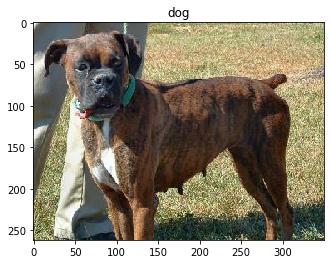

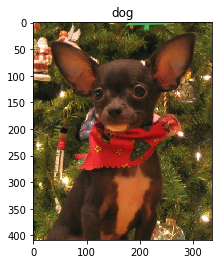

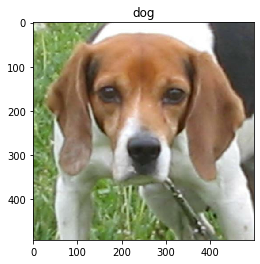

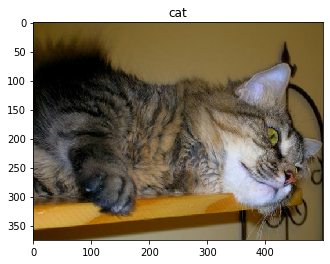

In [22]:
## plot some images and labels
get_label_name = metadata.features['label'].int2str
for image, label in raw_train.take(4):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [23]:
# resize all the images to 160x160 and rescale the input values to [-1,1]:

IMG_SIZE = 160 # All images will be resized to 160x160
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [24]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [25]:
# shuffle and batch the data
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [26]:
# inspect a batch of data
for image_batch, label_batch in train_batches.take(1):
   pass

print(image_batch.shape)

(32, 160, 160, 3)
